In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('iris',dtype = 'str')

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values

In [6]:
y = df['species'].values

In [7]:
species = {}
count = 0
for str in y:
    if str not in species:
        species[str]= count
        count +=1

In [8]:
species

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [9]:
for specie in species.keys():
    print(specie)

setosa
versicolor
virginica


In [10]:
for key, value in species.items():
    for i in range(len(y)):
        if y[i] == key:
            y[i] = value

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 30)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

In [14]:
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(10, input_dim=4))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(x = X_train, y = y_train,epochs = 15)

Epoch 1/15
105/105 [==============================] - 0s 2ms/sample - loss: 0.8484 - acc: 0.6952
Epoch 2/15
105/105 [==============================] - 0s 76us/sample - loss: 0.8095 - acc: 0.6857
Epoch 3/15
105/105 [==============================] - 0s 76us/sample - loss: 0.7731 - acc: 0.6857
Epoch 4/15
105/105 [==============================] - 0s 66us/sample - loss: 0.7351 - acc: 0.6952
Epoch 5/15
105/105 [==============================] - 0s 85us/sample - loss: 0.7021 - acc: 0.7429
Epoch 6/15
105/105 [==============================] - 0s 104us/sample - loss: 0.6705 - acc: 0.8000
Epoch 7/15
105/105 [==============================] - 0s 85us/sample - loss: 0.6424 - acc: 0.8762
Epoch 8/15
105/105 [==============================] - 0s 57us/sample - loss: 0.6174 - acc: 0.9143
Epoch 9/15
105/105 [==============================] - 0s 76us/sample - loss: 0.5936 - acc: 0.9429
Epoch 10/15
105/105 [==============================] - 0s 76us/sample - loss: 0.5727 - acc: 0.9524
Epoch 11/15
105/105

In [18]:
lost_df = pd.DataFrame(model.history.history)

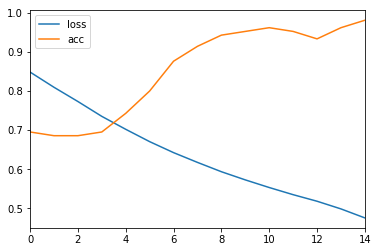

In [19]:
lost_df.plot()

In [20]:
lost_, acc_ = model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 1ms/sample - loss: 0.4870 - acc: 0.9556


In [21]:
test_predictions = model.predict(X_test)
test_predictions

array([[0.7799234 , 0.18850464, 0.031572  ],
       [0.79468894, 0.18070856, 0.02460248],
       [0.7438276 , 0.21521756, 0.04095479],
       [0.01344576, 0.3843346 , 0.60221964],
       [0.09525523, 0.55037683, 0.35436794],
       [0.08095276, 0.5338822 , 0.38516504],
       [0.02076354, 0.42838556, 0.5508509 ],
       [0.01435223, 0.37826195, 0.60738575],
       [0.07762586, 0.5605404 , 0.36183372],
       [0.0057685 , 0.38491333, 0.60931814],
       [0.7451979 , 0.21188295, 0.04291918],
       [0.01095739, 0.41001844, 0.5790242 ],
       [0.12490441, 0.5243138 , 0.35078177],
       [0.07486035, 0.55905014, 0.36608952],
       [0.7322004 , 0.22057216, 0.04722741],
       [0.07359554, 0.5657331 , 0.36067137],
       [0.81111294, 0.17172608, 0.01716091],
       [0.7624963 , 0.1960461 , 0.04145769],
       [0.73050284, 0.23323856, 0.03625862],
       [0.02149964, 0.451323  , 0.52717733],
       [0.02315975, 0.48720455, 0.48963568],
       [0.75409514, 0.20875727, 0.03714759],
       [0.

In [22]:
np.argmax(test_predictions[3])

2

In [23]:
y_pred = []
for i in range(45):
    y_pred.append(np.argmax(test_predictions[i]))

In [24]:
y_pred = np.array(y_pred)
y_test = np.array(y_test, dtype = int)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 19]], dtype=int64)